This notebook analyze:
1. Shear angle for every test cases
2. Shear angle's descriptive statistics
2. Runoff distance and normalized 
3. Normalized Runoff Distance
4. Plotted graph, norm. runoff distance vs column ratio

##COLUMN SPECIFICATIONS
b = 0.5 #Column Width
h = b*ratio
E = 10MPa
poisson's = 0.3
frictions = 0.3
soil's desity = 

In [11]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.colors as pcl
import seaborn as sns
import math
import matplotlib.markers as mks
import os

x = []
b = 0.5 #Column Width
for filename in os.listdir(path='.'):
    if filename.endswith("C.h5"):
        df = pd.read_hdf(filename, 'table')
        
        ##Shear Angle
        slope_df = df.loc[(df['strain_xx']>0.9)&(df['strain_xx']<1.1)]
        slope = stats.linregress(slope_df['coord_x'], slope_df['coord_y'])[0]
        angle = np.arctan(slope)*180/np.pi
        temp1 = pd.Series(data=angle, index=['Shear Angle'])
        
        ##Runoff Distance
        temp2 = df[["coord_x"]].quantile(0.99)
        temp = pd.concat([temp1, temp2])
        temp.name = int(str(filename)[1:4])/100
        x.append(temp)

data = pd.concat(x, axis=1)
data = data.transpose()
data = data.reset_index()
data = data.rename(columns={ "index":"Ratio","coord_x": "Runoff Distance"})
data['Normalized Runoff Distance']= data['Runoff Distance']/b
data = data.sort_values(by=['Ratio'], ignore_index=True)
print('SUDUT GESER')
print(data.describe().loc[['mean', 'min', 'max'],"Shear Angle"])

#linear regress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(data.loc[[5:]'Ratio'], data.loc[[5:]'Normalized Runoff Distance'])

#Exponential Fitting
def test(x, a, b): 
    return a * np.exp(b * x) 

popt, pcov = curve_fit(test, xdata=data['Ratio'], ydata=data['Normalized Runoff Distance']) 
data

#log fitting
def func(x,a,b):
    return a*np.log(x)+ b


popt, pcov = curve_fit(func, xdata=data['Ratio'], ydata=data['Normalized Runoff Distance'])
data

SyntaxError: invalid syntax (<ipython-input-11-e1b8deb492bb>, line 40)

In [9]:
#Staron
x_staron_scol = np.linspace(0.5,2,1000)
x_staron_lcol = np.linspace(2,5,1000)

y_staron_scol = 2.5*x_staron_scol
y_staron_lcol = 3.25*(x_staron_lcol**0.705)

#lube
x_lube_scol = np.linspace(0.5,2.3,1000)
x_lube_lcol = np.linspace(2.3,5,1000)

y_lube1_scol = 1.6*x_lube_scol
y_lube1_lcol = 2.3*(x_lube_lcol**(2/3))

y_lube2_scol = 1.2*x_lube_scol
y_lube2_lcol = 1.9*(x_lube_lcol**(2/3))

#MPM CB-Geo phi=33 friction=0.3
x_mpm = np.linspace(1, 5, 2000)
y_mpm = intercept + slope*x_mpm
#y_mpm = (param[0]*(np.exp(param[1]*x_mpm))) 
#y_mpm = func(x_mpm, *popt)

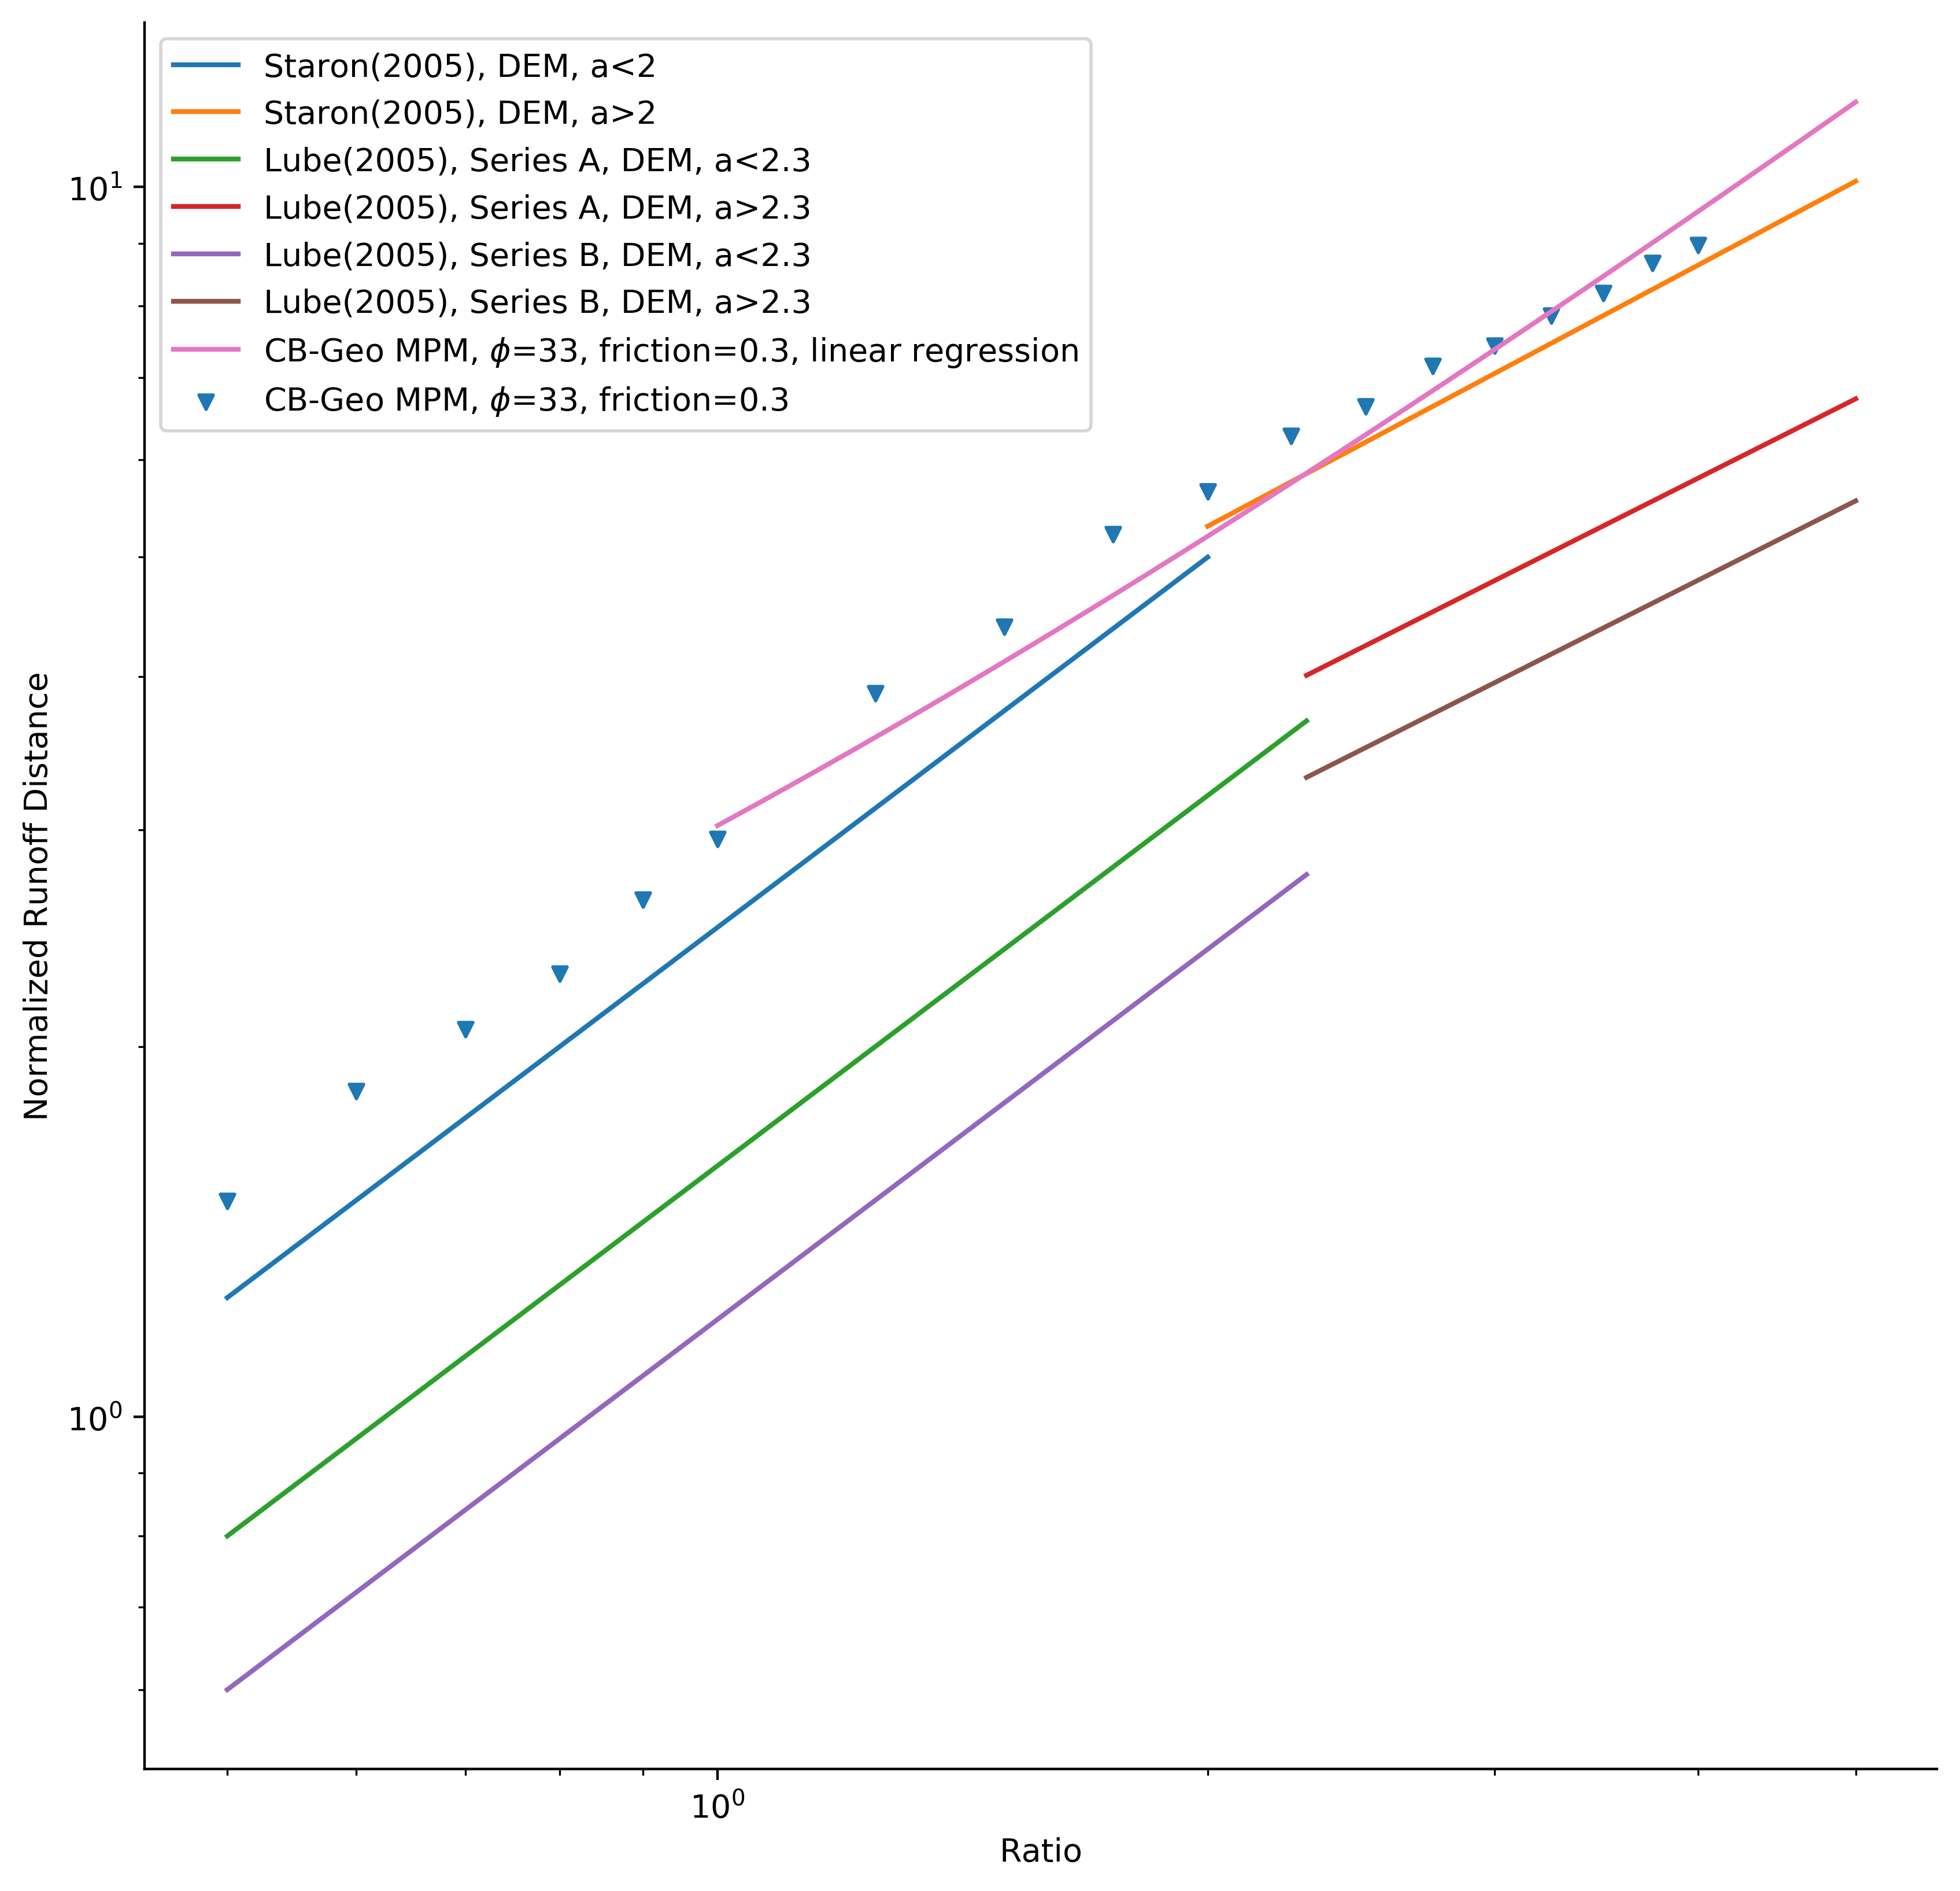

In [10]:
fig = plt.figure(figsize=[10, 10], dpi=400.0)
ax = fig.add_subplot(111)
data.plot.scatter(0, 3, label="CB-Geo MPM, $\phi$=33, friction=0.3", ax=ax, marker='v')
ax.plot(x_staron_scol, y_staron_scol, label="Staron(2005), DEM, a<2")
ax.plot(x_staron_lcol, y_staron_lcol, label="Staron(2005), DEM, a>2")
ax.plot(x_lube_scol, y_lube1_scol, label="Lube(2005), Series A, DEM, a<2.3")
ax.plot(x_lube_lcol, y_lube1_lcol, label="Lube(2005), Series A, DEM, a>2.3")
ax.plot(x_lube_scol, y_lube2_scol, label="Lube(2005), Series B, DEM, a<2.3")
ax.plot(x_lube_lcol, y_lube2_lcol, label="Lube(2005), Series B, DEM, a>2.3")
ax.plot(x_mpm, y_mpm, label="CB-Geo MPM, $\phi$=33, friction=0.3, linear regression")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.savefig('plot.svg', dpi=300, bbox_inches='tight')

In [8]:
#fig, ax = plt.subplots()
#ax.scatter(x, y, s=0.1, c=strain, cmap='jet', vmin=0, vmax=1, marker=mks.MarkerStyle(marker='.', fillstyle='full'))
#ax.spines['left'].set_position('zero')
#ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
#ax.spines['top'].set_color('none')
#ax.set_xlim(right=3)
#ax.axis('scaled')
#ax.set_xticks(np.arange(0, 3.5, step=0.5))
#ax.set_yticks(np.arange(0.5, 1.5, step=0.5))
#plt.savefig('plot.png', dpi=300, bbox_inches='tight')
#print(type(ax.spines['right']))

Next test
phi = 20 ~ 30 ~ 40
frictions ->>> 0.2 ~ 0.6

Coba bikin paper >> Indo >> 